In this assignment students need to predict whether a person makes over 50K per year or not from classic adult 
dataset using XGBoost. The description of the dataset is as follows:
Data Set Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted 
using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
Attribute Information:
Listing of attributes:
>50K, <=50K.
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 
1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, 
Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof- specialty, Handlers-cleaners, 
Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. race: White, Asian-Pac-Islander, 
Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, 
Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, 
Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, 
Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [3]:
# Import the required modules. 
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Get the training and test datasets
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, 
                       header = None)

In [5]:
# Display the first few rows of the train dataset
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Display the first few rows of the test dataset
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
# Check the shape of the train dataset
train_set.shape

(32561, 15)

In [8]:
# Check the shape of the test dataset
test_set.shape

(16281, 15)

In [9]:
# There is no column name for the data. So add column names based on the description.
cols=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
     'race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
train_set.columns=cols
train_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
# Set the column names to the test dataset
test_set.columns=cols
test_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [11]:
# Check if there are any null values in the train dataset
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
# Check if there are any nulls in the train dataset. 
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16281 non-null object
salary            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [13]:
# There are no nulls in the data, but data with ' ?'. Replace them with Nulls and remove the rows. 
train_new=train_set.replace(' ?', np.nan).dropna()
test_new=test_set.replace(' ?',np.nan).dropna()

# There is a difference between the train salary category and test salary category. Change them to be the same. 
test_new['salary']=test_new.salary.replace({' <=50K.':' <=50K',' >50K.':' >50K'})
test_new.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [14]:
# XGBoost only accepts numerical value. So change the non numerical values to categorical values. 

for attrb in train_new.columns:
    if train_new[attrb].dtype=='object':
        train_new[attrb]=pd.Categorical(train_new[attrb]).codes
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null int8
fnlwgt            30162 non-null int64
education         30162 non-null int8
education-num     30162 non-null int64
marital-status    30162 non-null int8
occupation        30162 non-null int8
relationship      30162 non-null int8
race              30162 non-null int8
sex               30162 non-null int8
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null int8
salary            30162 non-null int8
dtypes: int64(6), int8(9)
memory usage: 1.9 MB


In [15]:
# Change the non numerical values to categorical values for the test dataset as well. 

for attrb in test_new.columns:
    if test_new[attrb].dtype=='object':
        test_new[attrb]=pd.Categorical(test_new[attrb]).codes
test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 15 columns):
age               15060 non-null int64
workclass         15060 non-null int8
fnlwgt            15060 non-null int64
education         15060 non-null int8
education-num     15060 non-null int64
marital-status    15060 non-null int8
occupation        15060 non-null int8
relationship      15060 non-null int8
race              15060 non-null int8
sex               15060 non-null int8
capital-gain      15060 non-null int64
capital-loss      15060 non-null int64
hours-per-week    15060 non-null int64
native-country    15060 non-null int8
salary            15060 non-null int8
dtypes: int64(6), int8(9)
memory usage: 956.0 KB


                     age  workclass    fnlwgt  education  education-num  \
age             1.000000   0.080540 -0.076511  -0.001111       0.043526   
workclass       0.080540   1.000000 -0.032493   0.017855       0.037833   
fnlwgt         -0.076511  -0.032493  1.000000  -0.027102      -0.044992   
education      -0.001111   0.017855 -0.027102   1.000000       0.345410   
education-num   0.043526   0.037833 -0.044992   0.345410       1.000000   
marital-status -0.276373  -0.034241  0.032163  -0.040664      -0.063419   
occupation     -0.005682   0.015572  0.000204  -0.038212       0.087717   
relationship   -0.246456  -0.067417  0.009298  -0.012717      -0.091935   
race            0.023374   0.044731 -0.023895   0.011154       0.032805   
sex             0.081993   0.074973  0.025362  -0.027888       0.006157   
capital-gain    0.080154   0.035350  0.000422   0.030575       0.124416   
capital-loss    0.060165   0.007204 -0.009750   0.015028       0.079646   
hours-per-week  0.101599 

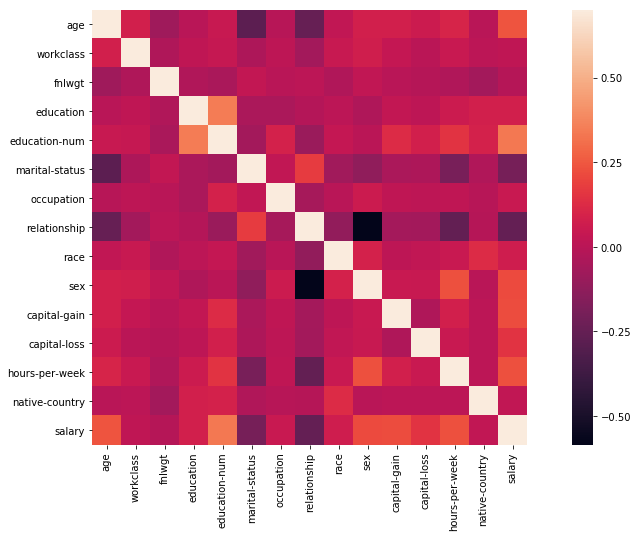

In [16]:
# Check the correlation between the different attributes. 

matrix = train_new.corr()
print(matrix)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(matrix, vmax=0.7, square=True)

In [17]:
# Take the target variable salary out of the data. 

y_train = train_new.pop('salary')
y_test = test_new.pop('salary')

In [18]:
# Set the parameters for the XGBoost. 

params = {
    'objective':'binary:logistic',
    'max_depth':3,
    'silent':1,
    'eta':0.5
}
num_rounds = 400

In [19]:
# Create DMatrix for train and test

dtrain=xgb.DMatrix(train_new,y_train) 
dtest=xgb.DMatrix(test_new,y_test)

In [20]:
print("Train possible labels: ")
print(np.unique(dtrain.get_label()))
print("Test possible labels: ")
print(np.unique(dtest.get_label()))

Train possible labels: 
[0. 1.]
Test possible labels: 
[0. 1.]


In [21]:
# Train the algorithm

bst=xgb.train(params,dtrain,num_rounds)

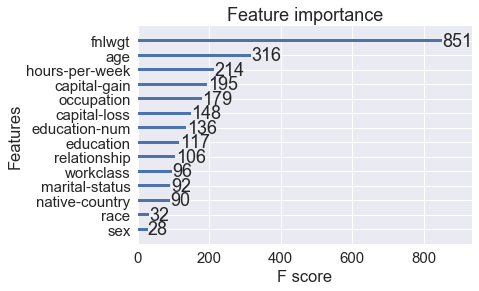

In [22]:
# FInd the importance of the different attributes on the salary. 
sns.set(font_scale = 1.5)
xgb.plot_importance(bst)

In [23]:
# Create the predictions for the test data

preds_prob = bst.predict(dtest)
preds_prob

array([0.00151292, 0.1106989 , 0.54122955, ..., 0.8791669 , 0.05968869,
       0.6078675 ], dtype=float32)

In [24]:
# Check if the test predictions were good. Get the error and accuracy of the prediction.  

labels = dtest.get_label()
preds = preds_prob > 0.5 # threshold
correct = 0
for i in range(len(preds)):
    if (labels[i] == preds[i]):
        correct += 1
print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Error: {0:.4f}'.format(1-correct/len(preds)))
print('Accuracy: {0:.4f}'.format(correct/len(preds)))

Predicted correctly: 13020/15060
Error: 0.1355
Accuracy: 0.8645
